# K-Means Clustering

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('Mall_Customers.csv')

# just anual income and spending score because teaching purposes (be able to plut the clusters)
X = dataset.iloc[:, [3, 4]].values

"""
In K-Means clustering, you don't typically use a Y (target) variable because it is an unsupervised machine learning
algorithm. Unsupervised learning means that you are not trying to predict a specific outcome or label. Instead, the
goal of K-Means is to find natural groupings or clusters within the data based on the similarities or distances
between data points
"""

"\nIn K-Means clustering, you don't typically use a Y (target) variable because it is an unsupervised machine learning\nalgorithm. Unsupervised learning means that you are not trying to predict a specific outcome or label. Instead, the\ngoal of K-Means is to find natural groupings or clusters within the data based on the similarities or distances\nbetween data points\n"

## Using the elbow method to find the optimal number of clusters

In [10]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    # training the kmeans algo
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.59595959593, 132087.72428243398, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33859.371012691015, 28437.457328040175, 21862.09267218289, 19787.670554966855]


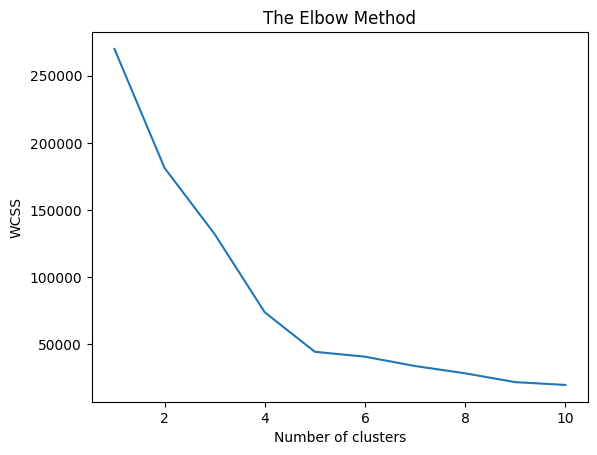

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

"""
We need to choose the number that start making the line on the graph more flat
In this case its beetween 4-6 = 5
So the optimal number of clusters for this dataset is 5
"""


## Training the K-Means model on the dataset

In [14]:
k = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')

# train + return the dependent variable (y)
y_kmeans = k.fit_predict(X)

print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

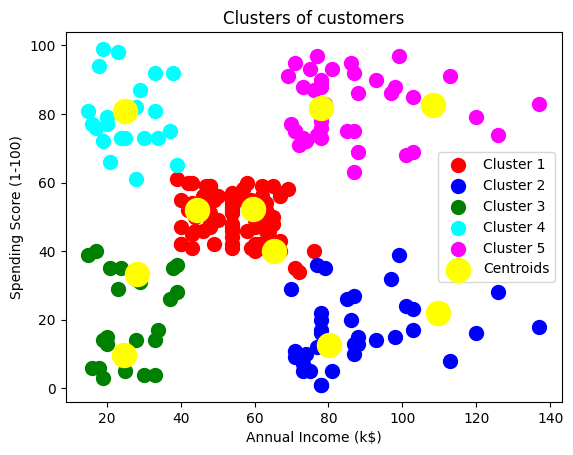

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()